### Objective:
* Implement Gradient Descent to update model weights and
* Experiment with different optimizers using TensorFlow or Pytorch

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch 
import torch.nn as nn
import torch.optim as optim

In [2]:
# Geneate Some Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

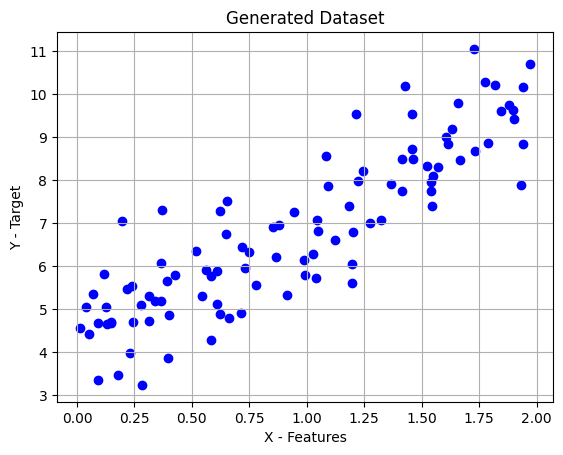

In [3]:
# Visualize the Data
plt.scatter(X, y, color="blue")
plt.title("Generated Dataset")
plt.xlabel("X - Features")
plt.ylabel("Y - Target")
plt.grid()
plt.show()

In [4]:
# Initialize parameters
m = 100
theta = np.random.rand(2, 1)
learning_rate = 0.1
iterations = 1000

# Add Bias term to X
X_bias = np.c_[np.ones((m, 1)), X]

In [5]:
# Gradient Descent
for iteration in range(iterations):
    gradients = 2/m * X_bias.T.dot(X_bias.dot(theta) - y)
    theta -= learning_rate * gradients

print("Optimized Parameters (Theta): \n", theta)

Optimized Parameters (Theta): 
 [[4.21509616]
 [2.77011339]]


In [7]:
# Prepare the Data
X_tensor = tf.constant(X, dtype=tf.float32)
y_tesnor = tf.constant(y, dtype=tf.float32)

In [8]:
# Define the Model
class LinearModel(tf.Module):
    def __init__(self):
        self.weights = tf.Variable(tf.random.normal([1]))
        self.bias = tf.Variable(tf.random.normal([1]))

    def __call__(self, X):
        return self.weights * X + self.bias

# Define the Loss Function
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [9]:
# Train with Stochastic Gradient Descent
model = LinearModel()
optimizer = tf.optimizers.SGD(learning_rate=0.1)

for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred = model(X_tensor)
        loss = mse_loss(y_tesnor, y_pred)
    gradients = tape.gradient(loss, [model.weights, model.bias])
    optimizer.apply_gradients(zip(gradients, [model.weights, model.bias]))
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

Epoch 0, Loss: 68.9888
Epoch 10, Loss: 1.2158
Epoch 20, Loss: 1.0109
Epoch 30, Loss: 0.9090
Epoch 40, Loss: 0.8579
Epoch 50, Loss: 0.8323
Epoch 60, Loss: 0.8195
Epoch 70, Loss: 0.8131
Epoch 80, Loss: 0.8098
Epoch 90, Loss: 0.8082


In [12]:
# Prepare data with Torch
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

# Define the Model
class LinearModelTorch(nn.Module):
    def __init__(self):
        super(LinearModelTorch, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model_torch = LinearModelTorch()

# Define Loss Function and Optimizer 
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.1)

# Train Model 
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model_torch(X_torch)
    loss = criterion(outputs, y_torch)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 43.1160
Epoch 10, Loss: 21.1443
Epoch 20, Loss: 8.0520
Epoch 30, Loss: 2.3968
Epoch 40, Loss: 1.0450
Epoch 50, Loss: 1.0464
Epoch 60, Loss: 1.0639
Epoch 70, Loss: 0.9839
Epoch 80, Loss: 0.9302
Epoch 90, Loss: 0.9105
